

## 1) Mounting Google Colab with Google Drive



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 2) Counting Types of Images Collected



In [3]:
import glob
DIR = "/content/drive/My Drive/Data/All Fish JPG/"
PNG_counter = len(glob.glob1(DIR,"*.png"))
JPG_counter = len(glob.glob1(DIR,"*.jpg"))

print("There are",PNG_counter,"PNG images and", JPG_counter, "JPG images collected")

There are 0 PNG images and 1099 JPG images collected


## 3) Putting Image Paths in List

In [5]:
from PIL import Image
import numpy as np
import sys
import os
import csv

# default format can be changed as needed
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList(DIR)

print("\nThere are",len(myFileList),"images read by Python")

myFileList

/content/drive/My Drive/Data/All Fish JPG/

There are 1099 images read by Python


['/content/drive/My Drive/Data/All Fish JPG/DSC_0896-800x530 (000) (001).jpg',
 '/content/drive/My Drive/Data/All Fish JPG/e379c6e9d3116e08cf755e04f8b3f454 (000) (001).jpg',
 '/content/drive/My Drive/Data/All Fish JPG/e379c6e9d3116e08cf755e04f8b3f454 (000).jpg',
 '/content/drive/My Drive/Data/All Fish JPG/esy-015055486 (000) (000).jpg',
 '/content/drive/My Drive/Data/All Fish JPG/e7712b2970983d0c75f283bb79a36895.png_265x265q80.jpg_ (000).jpg',
 '/content/drive/My Drive/Data/All Fish JPG/esy-015055486 (000).jpg',
 '/content/drive/My Drive/Data/All Fish JPG/esy-015055486 (000) (001).jpg',
 '/content/drive/My Drive/Data/All Fish JPG/e7712b2970983d0c75f283bb79a36895.png_265x265q80.jpg_ (001).jpg',
 '/content/drive/My Drive/Data/All Fish JPG/esy-035049645 (000) (000).jpg',
 '/content/drive/My Drive/Data/All Fish JPG/e7712b2970983d0c75f283bb79a36895.png_265x265q80.jpg_.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/e7712b2970983d0c75f283bb79a36895.png_265x265q80.jpg_ (002).jpg',
 '/conten

## 4) Reading Images in Colour & Illustrating them

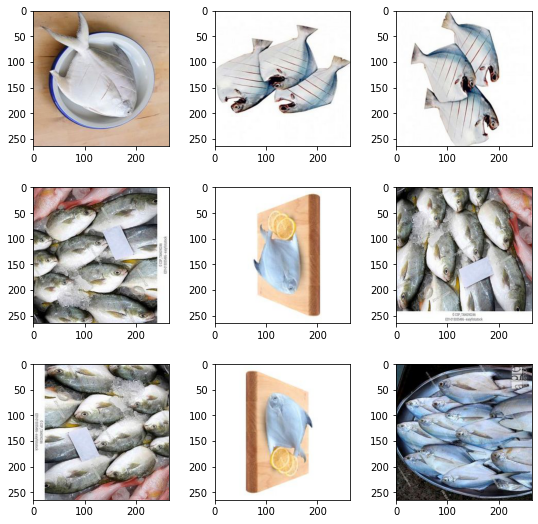

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    img = Image.open(myFileList[i])
    img = img.resize((265,265))
    # Plot image.
    ax.imshow(img, cmap='binary')

## 5) Resizing & Normalising the Images

In [11]:
import cv2 as cv
import numpy as np
from tqdm import tqdm

images = []
processed_images = []

for index in tqdm(range(len(myFileList))):
    image = cv.imread(myFileList[index], cv.IMREAD_COLOR)  # uint8 image
    small_image = cv.resize(image,(50,50))
    norm_image = cv.normalize(small_image, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    images.append(image)
    processed_images.append(norm_image)

100%|██████████| 1099/1099 [00:05<00:00, 213.10it/s]


In [17]:
images[0].shape

(265, 265, 3)

In [13]:
processed_images[0].shape

(50, 50, 3)

## 6) Visualising Normalised Images

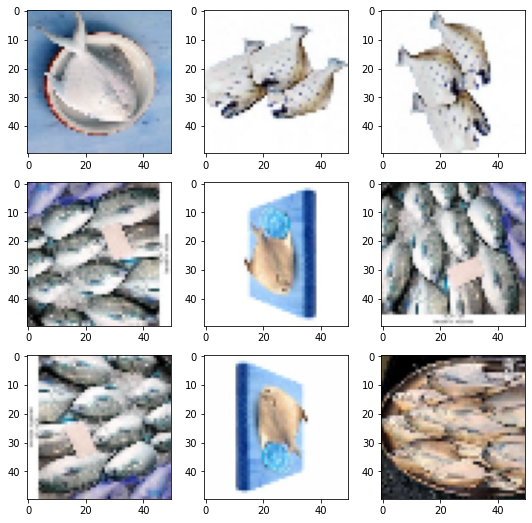

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(processed_images[i], cmap='binary')

## 7) Flattening the Images' pixels into Dataframe

In [ ]:
from tqdm import tqdm
import pandas as pd

flatten_df = pd.DataFrame(columns = range(7500)) # 210675 because 265 x 265 x 3

for index in tqdm(range(len(processed_images))):
  flatten_images = processed_images[index].flatten()
  transposed_flat = pd.DataFrame(flatten_images).T
  flatten_df = flatten_df.append(transposed_flat)

flatten_df

100%|██████████| 1099/1099 [00:06<00:00, 157.81it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7460,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.689362,0.744681,0.778723,0.582979,0.629787,0.663830,0.595745,0.629787,0.672340,0.608511,0.634043,0.689362,0.531915,0.553191,0.608511,0.591489,0.600000,0.642553,0.731915,0.744681,0.787234,0.702128,0.723404,0.765957,0.697872,0.727660,0.765957,0.731915,0.770213,0.800000,0.761702,0.791489,0.821277,0.723404,0.736170,0.770213,0.693617,0.697872,0.740426,0.757447,...,0.876596,0.791489,0.804255,0.838298,0.761702,0.774468,0.808511,0.774468,0.761702,0.782979,0.765957,0.744681,0.753191,0.693617,0.672340,0.676596,0.753191,0.736170,0.757447,0.778723,0.791489,0.825532,0.765957,0.787234,0.834043,0.842553,0.842553,0.889362,0.748936,0.736170,0.770213,0.689362,0.672340,0.697872,0.659574,0.634043,0.655319,0.587234,0.561702,0.591489
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.618110,0.645669,0.677165,0.590551,0.622047,0.649606,0.614173,0.645669,0.673228,0.610236,0.649606,0.681102,0.559055,0.598425,0.625984,0.625984,0.665354,0.692913,0.649606,0.692913,0.708661,0.661417,0.696850,0.728346,0.677165,0.712598,0.748031,0.653543,0.692913,0.720472,0.625984,0.665354,0.692913,0.614173,0.653543,0.685039,0.661417,0.688976,0.716535,0.618110,...,0.763780,0.685039,0.720472,0.732283,0.724409,0.759843,0.771654,0.692913,0.728346,0.744094,0.681102,0.704724,0.724409,0.704724,0.716535,0.736220,0.712598,0.728346,0.748031,0.732283,0.748031,0.767717,0.728346,0.744094,0.763780,0.728346,0.744094,0.763780,0.720472,0.736220,0.755906,0.685039,0.700787,0.720472,0.732283,0.748031,0.767717,0.728346,0.744094,0.763780
0,0.117647,0.117647,0.117647,0.145098,0.145098,0.145098,0.133333,0.133333,0.133333,0.133333,0.141176,0.141176,0.113725,0.129412,0.133333,0.713726,0.733333,0.737255,0.615686,0.627451,0.647059,0.533333,0.552941,0.564706,0.541176,0.568627,0.584314,0.521569,0.549020,0.576471,0.611765,0.647059,0.666667,0.576471,0.615686,0.635294,0.607843,0.635294,0.674510,0.368627,...,0.650980,0.788235,0.823529,0.878431,0.866667,0.890196,0.941177,0.741176,0.760784,0.819608,0.705882,0.729412,0.780392,0.878431,0.901961,0.945098,0.937255,0.960784,1.000000,0.933333,0.952941,0.964706,0.878431,0.901961,0.925490,0.674510,0.701961,0.737255,0.537255,0.556863,0.584314,0.517647,0.533333,0.545098,0.482353,0.486275,0.486275,0.262745,0.254902,0.254902
0,0.893720,0.913043,0.884058,0.893720,0.913043,0.884058,0.898551,0.917874,0.888889,0.898551,0.917874,0.888889,0.898551,0.917874,0.888889,0.898551,0.917874,0.888889,0.903382,0.927536,0.884058,0.893720,0.927536,0.893720,0.893720,0.927536,0.903382,0.903382,0.932367,0.908212,0.903382,0.932367,0.908212,0.903382,0.932367,0.908212,0.903382,0.927536,0.917874,0.903382,...,0.975845,0.951691,0.985507,0.971014,0.951691,0.985507,0.971014,0.946860,0.975845,0.971014,0.942029,0.975845,0.961353,0.937198,0.971014,0.946860,0.932367,0.966184,0.951691,0.922705,0.956522,0.942029,0.922705,0.956522,0.942029,0.922705,0.946860,0.937198,0.913043,0.942029,0.917874,0.913043,0.942029,0.913043,0.903382,0.937198,0.903382,0.898551,0.932367,0.898551
...,...,...,...,...,...,...,...,...,...,...,...,...,...

## 8) Saving the Dataframe into CSV Format

In [ ]:
flatten_df.to_csv('/content/drive/My Drive/Data/CSV Converted Small Images (Colour).csv', index = False,header=False)

---